# Comparison of all Pedersen N02 cases

## Nalu-Wind/AMR-Wind vs Pedersen (2014) results

Comparison between our runs and Pedersen's 2014 paper

**Note**: Sandians run using `canopy/2.1.9` to get all of the right libraries

In [1]:
%%capture
import sys
sys.path.insert(1, '../utilities')
import windspectra, load_data
import numpy as np
import matplotlib.pyplot as plt

#from matplotlib.backends.backend_pdf import PdfPages
%matplotlib inline

In [16]:
# Provide locations and parameters of data
l_cases = {
    '3.125m AMR-wind': load_data.AMRWindStats('AmrWindKsgs_3p125'),
    '3.125m NALU-wind': load_data.NaluWindStats('NaluWindRun03'),
    #'amrwind-ksgs-1.5625m': load_data.AMRWindStats('AmrWindKsgs_1p5625'),
    'GABLS: CORA': load_data.GABLSData('gabls_data/res_3.125m/CORA'),
    'GABLS: CSU': load_data.GABLSData('gabls_data/res_3.125m/CSU'),
    'GABLS: IMUK': load_data.GABLSData('gabls_data/res_3.125m/IMUK'),    
    'GABLS: LLNL': load_data.GABLSData('gabls_data/res_3.125m/LLNL'),   
    'GABLS: MO': load_data.GABLSData('gabls_data/res_3.125m/MO'),
    'GABLS: NCAR': load_data.GABLSData('gabls_data/res_3.125m/NCAR'),
    'GABLS: NERSC': load_data.GABLSData('gabls_data/res_3.125m/NERSC'),
    'GABLS: UIB': load_data.GABLSData('gabls_data/res_3.125m/UIB')
    }

# What kind of line styles to use in the plots
styles = {
    '3.125m AMR-wind':  {'color':'r', 'lw':2.5, 'ls':'-'},
    '3.125m NALU-wind':  {'color':'b', 'lw':2.5, 'ls':'-'},
    'GABLS: CORA':    {'color':'c',    'lw':0.5, 'ls':'-'},
    'GABLS: CSU':     {'color':'g',    'lw':0.5, 'ls':'-'},
    'GABLS: IMUK':    {'color':'y',    'lw':0.5, 'ls':'-'},
    'GABLS: LLNL':    {'color':'gray', 'lw':0.5, 'ls':'-'},
    'GABLS: MO':      {'color':'c',    'lw':0.5, 'ls':'--'},
    'GABLS: NCAR':    {'color':'g',    'lw':0.5, 'ls':'--'},
    'GABLS: NERSC':   {'color':'y',    'lw':0.5, 'ls':'--'},
    'GABLS: UIB':     {'color':'gray', 'lw':0.5, 'ls':'--'},
    
}

deltaX=3000.0/288         # Grid spacing


('Reading ', 'gabls_data/res_3.125m/CORA/CORA_B9_128.dat')
('Reading ', 'gabls_data/res_3.125m/CSU/CSU_B9_128.dat')
('Reading ', 'gabls_data/res_3.125m/IMUK/IMUK_B9_128.dat')
('Reading ', 'gabls_data/res_3.125m/LLNL/LLNL_B9_128.dat')
('Reading ', 'gabls_data/res_3.125m/MO/MO_B9_128.dat')
('Reading ', 'gabls_data/res_3.125m/NCAR/NCAR_B9_128.dat')
('Reading ', 'gabls_data/res_3.125m/NERSC/NERSC_B9_128.dat')
('Reading ', 'gabls_data/res_3.125m/UIB/UIB_B9_128.dat')


## Plot velocity profiles

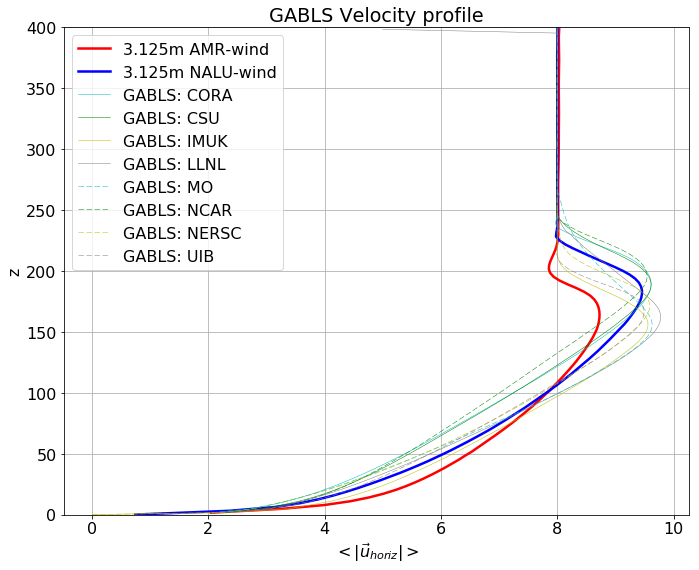

In [19]:
fig = plt.figure(figsize=(10,8))
plt.rc('font', size=16)

#for l,c in l_cases.items().sort():
for l,c, in sorted(l_cases.iteritems(), key=lambda key_value: key_value[0]):
    ls=styles[l]
    plt.plot(c.hvelmag, c.z, label=l, color=ls['color'], linewidth=ls['lw'], linestyle=ls['ls'])
plt.ylim()
plt.xlabel(r'$< | \vec{u}_{horiz} | >$')
plt.ylabel('z')
plt.legend(loc=0)
plt.ylim(0,400)
plt.grid()
plt.tight_layout()
plt.title('GABLS Velocity profile')


## Plot temperature

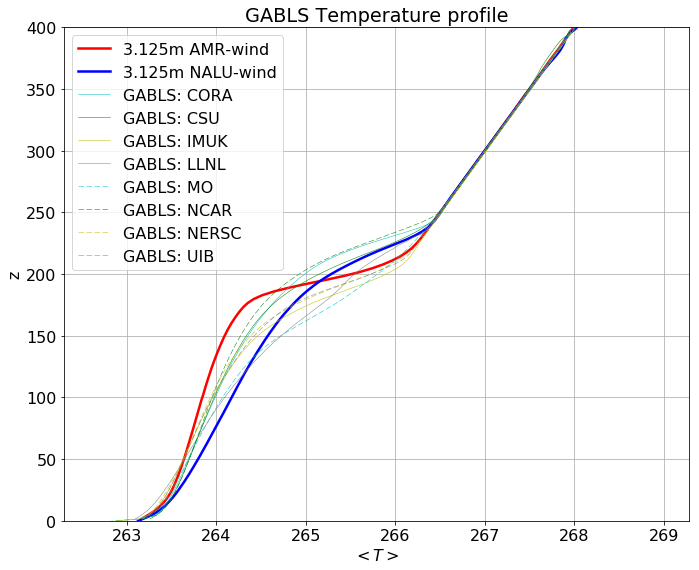

In [20]:
fig = plt.figure(figsize=(10,8))
plt.rc('font', size=16)

#for l,c in l_cases.items():
for l,c, in sorted(l_cases.iteritems(), key=lambda key_value: key_value[0]):
    ls=styles[l]
    plt.plot(c.T, c.z, label=l, color=ls['color'], linewidth=ls['lw'], linestyle=ls['ls'])
plt.xlabel(r'$<T>$')
plt.ylabel('z')
plt.legend(loc=0)
plt.ylim(0,400)
plt.grid()
plt.tight_layout()
plt.title('GABLS Temperature profile')

## Print out some Ustar values

In [22]:
for l,c, in sorted(l_cases.iteritems(), key=lambda key_value: key_value[0]):
    print(l+' utau =  %f'%float(c.istats['ustar']))

3.125m AMR-wind utau =  0.291970
3.125m NALU-wind utau =  0.410000
GABLS: CORA utau =  0.282432
GABLS: CSU utau =  0.308878
GABLS: IMUK utau =  0.290956
GABLS: LLNL utau =  0.266159
GABLS: MO utau =  0.255763
GABLS: NCAR utau =  0.294504
GABLS: NERSC utau =  0.277563
GABLS: UIB utau =  0.259227


## Plot Reynolds stresses

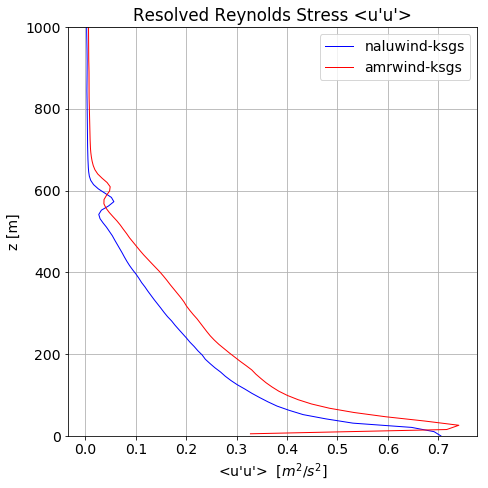

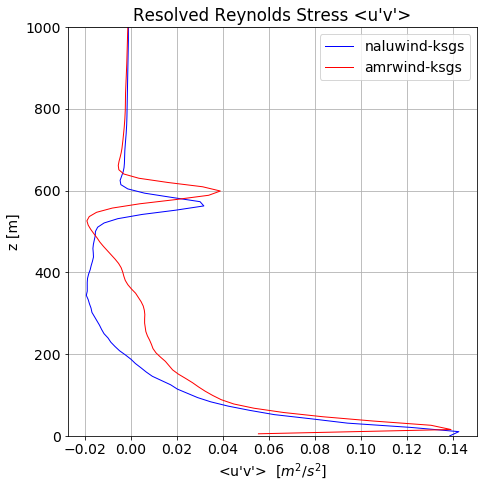

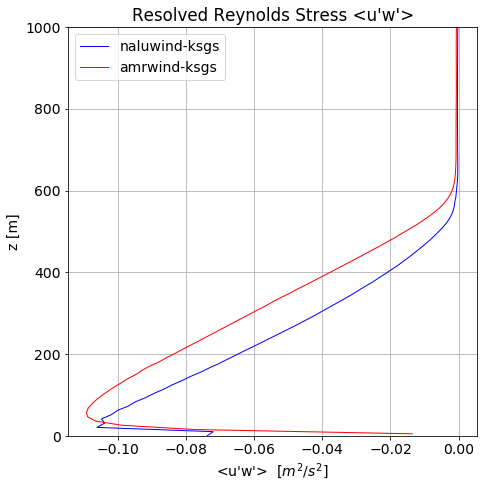

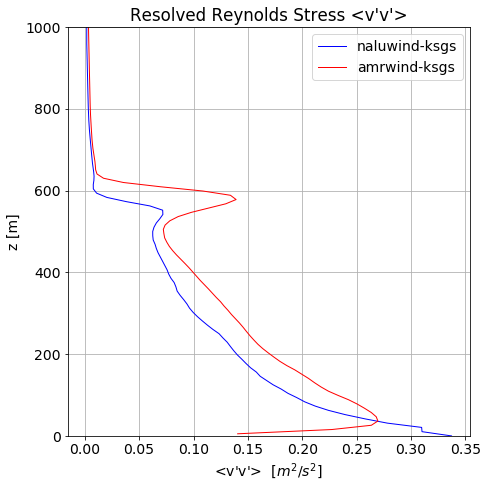

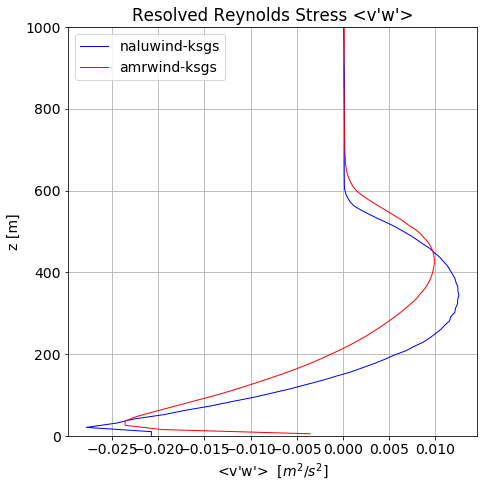

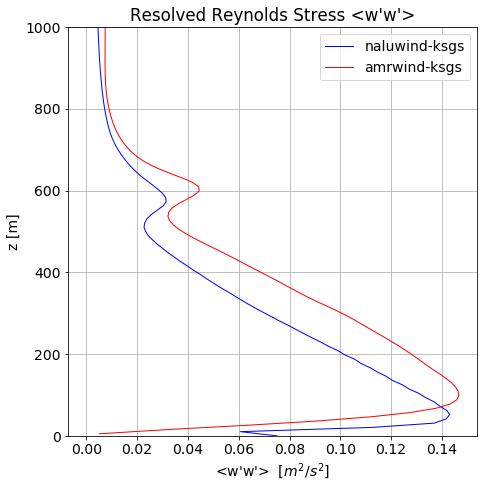

In [5]:
# Plot these stresses in this order
plotstresses=["<u'u'>", "<u'v'>", "<u'w'>", "<v'v'>", "<v'w'>", "<w'w'>"]

for stress in plotstresses:
    fig = plt.figure(figsize=(7,7))
    plt.rc('font', size=14)
    for l,c in l_cases.items():
        ls=styles[l]
        if (len(c.vel_var[stress])>0): 
            plt.plot(c.vel_var[stress], c.z, label=l, color=ls['color'], linewidth=ls['lw'], linestyle=ls['ls'])
    plt.legend()
    plt.ylabel('z [m]')
    plt.xlabel(stress+'  [$m^2/s^2$]')
    plt.ylim([0,1000])
    plt.grid()
    plt.title('Resolved Reynolds Stress '+stress)
    plt.tight_layout()

## Plot Spectra

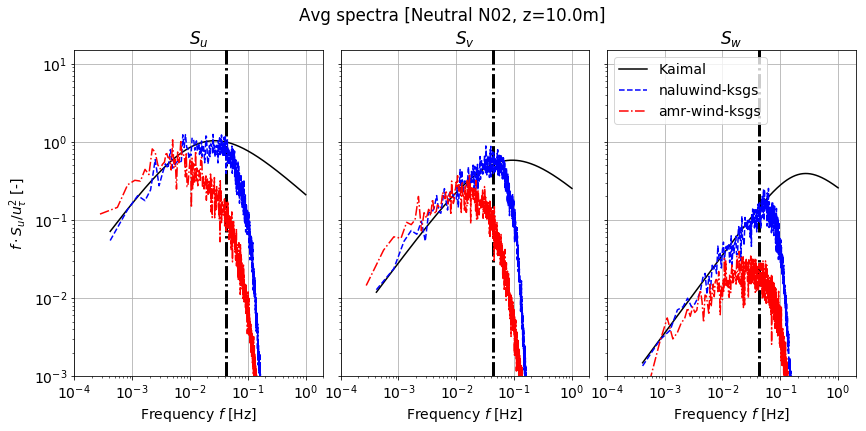

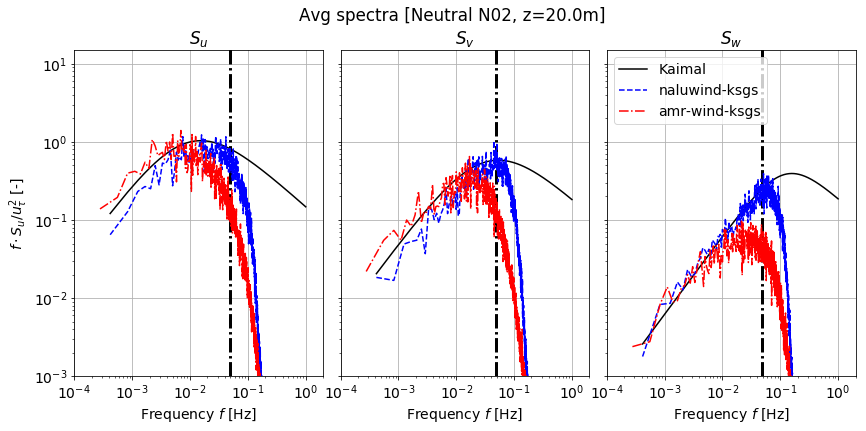

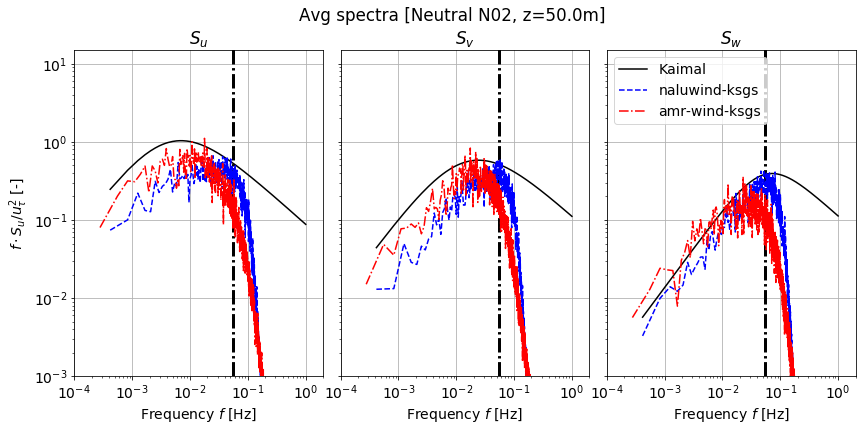

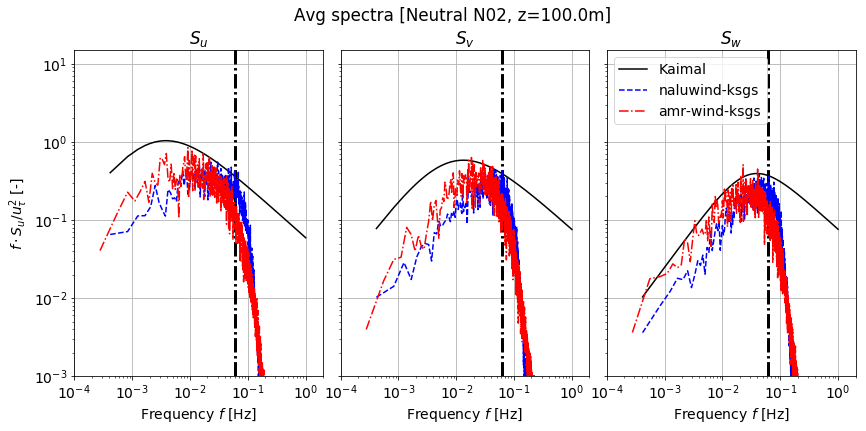

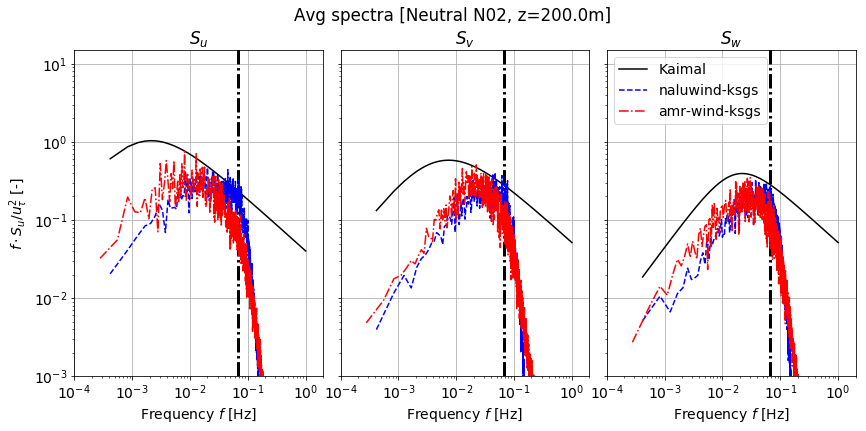

In [6]:
for i, z in enumerate(l_cases['naluwind-ksgs'].ps_data['z']):
    f, suu, svv, sww = l_cases['naluwind-ksgs'].point_spectra(z)
    utau = l_cases['naluwind-ksgs'].istats['ustar']
    hvelmag = l_cases['naluwind-ksgs'].interp_hvelmag(z)
    f_a, suu_a, svv_a, sww_a = l_cases['amrwind-ksgs'].point_spectra(z)
    utau_a = float(l_cases['amrwind-ksgs'].istats['ustar'])
    fmax = 0.6*hvelmag/(8*deltaX)
    
    fig, axs = plt.subplots(1,3,figsize=(14,6),sharey=True)
    # Plot Suu spectra
    lineu, = axs[0].loglog(f, windspectra.getKaimal(f, z, hvelmag ),label='Kaimal - u', color='k')
    axs[0].loglog(f, f * suu/(utau * utau) , '--', color='b',label='naluwind-ksgs - u')
    axs[0].loglog(f_a, f_a * suu_a/(utau_a * utau_a),  '-.', color='r', label='amr-wind-ksgs - u')
    axs[0].vlines(fmax, 5e-4, 20,lw=3, linestyle='-.')
    axs[0].set_xlim(1e-4,2)
    axs[0].set_ylim(1e-3,15)
    axs[0].grid()
    axs[0].set_xlabel('Frequency $f$ [Hz]')
    axs[0].set_ylabel('$f\cdot S_{u}/u_{\\tau}^2$ [-]')
    axs[0].set_title('$S_{u}$')

    # Plot Svv spectra
    linev, = axs[1].loglog(f, windspectra.getKaimal(f, z, hvelmag, params=windspectra.vKaimalconst),label='Kaimal - v', color='k')
    axs[1].loglog(f, f * svv/(utau * utau) , '--', color='b', label='naluwind-ksgs - v')
    axs[1].loglog(f_a, f_a * svv_a/(utau_a * utau_a) , '-.', color='r', label='amr-wind-ksgs - v')
    axs[1].vlines(fmax, 5e-4, 20,lw=3, linestyle='-.')
    axs[1].set_xlim(1e-4,2)
    axs[1].set_ylim(1e-3,15)
    axs[1].grid()
    axs[1].set_xlabel('Frequency $f$ [Hz]')
    axs[1].set_title('$S_{v}$')
    
    # Plot Sww spectra
    linew, = axs[2].loglog(f, windspectra.getKaimal(f, z, hvelmag, params=windspectra.wKaimalconst),label='Kaimal', color='k')
    axs[2].loglog(f, f * sww/(utau * utau) , '--', color='b', label='naluwind-ksgs')
    axs[2].loglog(f_a, f_a * sww_a/(utau_a * utau_a) , '-.', color='r',  label='amr-wind-ksgs')
    axs[2].vlines(fmax, 5e-4, 20,lw=3, linestyle='-.')
    axs[2].set_xlim(1e-4,2)
    axs[2].set_ylim(1e-3,15)
    axs[2].grid()
    axs[2].set_xlabel('Frequency $f$ [Hz]')
    axs[2].set_title('$S_{w}$')
    axs[2].legend(loc='upper left')

    
    fig.suptitle('Avg spectra [Neutral N02, z={:.1f}m]'.format(z))
    plt.subplots_adjust(wspace=0.07)